**Quick analysis on the Suicide Dataset from 1985 to 2016.**

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Importing libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset into a variable called *data* and get a sneak preview of the dataset

In [59]:
data = pd.read_csv('../input/master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Let's dive a little deeper to explore the dataset.
* Check the number of observation
* Check the type of features and if it contains missing value

In [60]:
print ("Data shape:", data.shape, "\n")
print (data.info())

Data shape: (27820, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


This Suicide-Rate dataset has 27820 number of observations (rows) and 12 features (columns). One thing that is obvious is the **HDI for year** feature has a large number of missing value and hence it wouldn't be considered later on. 

Description of features:
1. **country**: country name
    * 101 unique value  
2. **year**: years
    * ranged between 1985 - 2016
3. **sex**: gender
    * female or male
4. **age**: age groups
    * 5-14 years
    * 15-24 years
    * 25-34 years
    * 35-54 years
    * 55-74 years
    * 75+ years
5. **suicides_no**: number of suicide cases in the given country, year, sex and age group
6. **population**: number of population
7. **suicides/100k pop**: suicide rate normalized by population number
8. **country-year**: country name + year
9. **HDI for year**: The Human Development Index (HDI) is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development.
10. **gdp_for_year**: Gross Domestic Product (GDP)
11. **gdp_per_capita**: GDP per capita is a measure of a country's economic output that accounts for its number of people. It divides the country's gross domestic product by its total population.
12. **generation**: generation group
    * Generation X
    * Silent
    * G.I. Generation
    * Boomers
    * Millenials
    * Generation Z 

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Question 1: Which country has the highest suicide rate?**

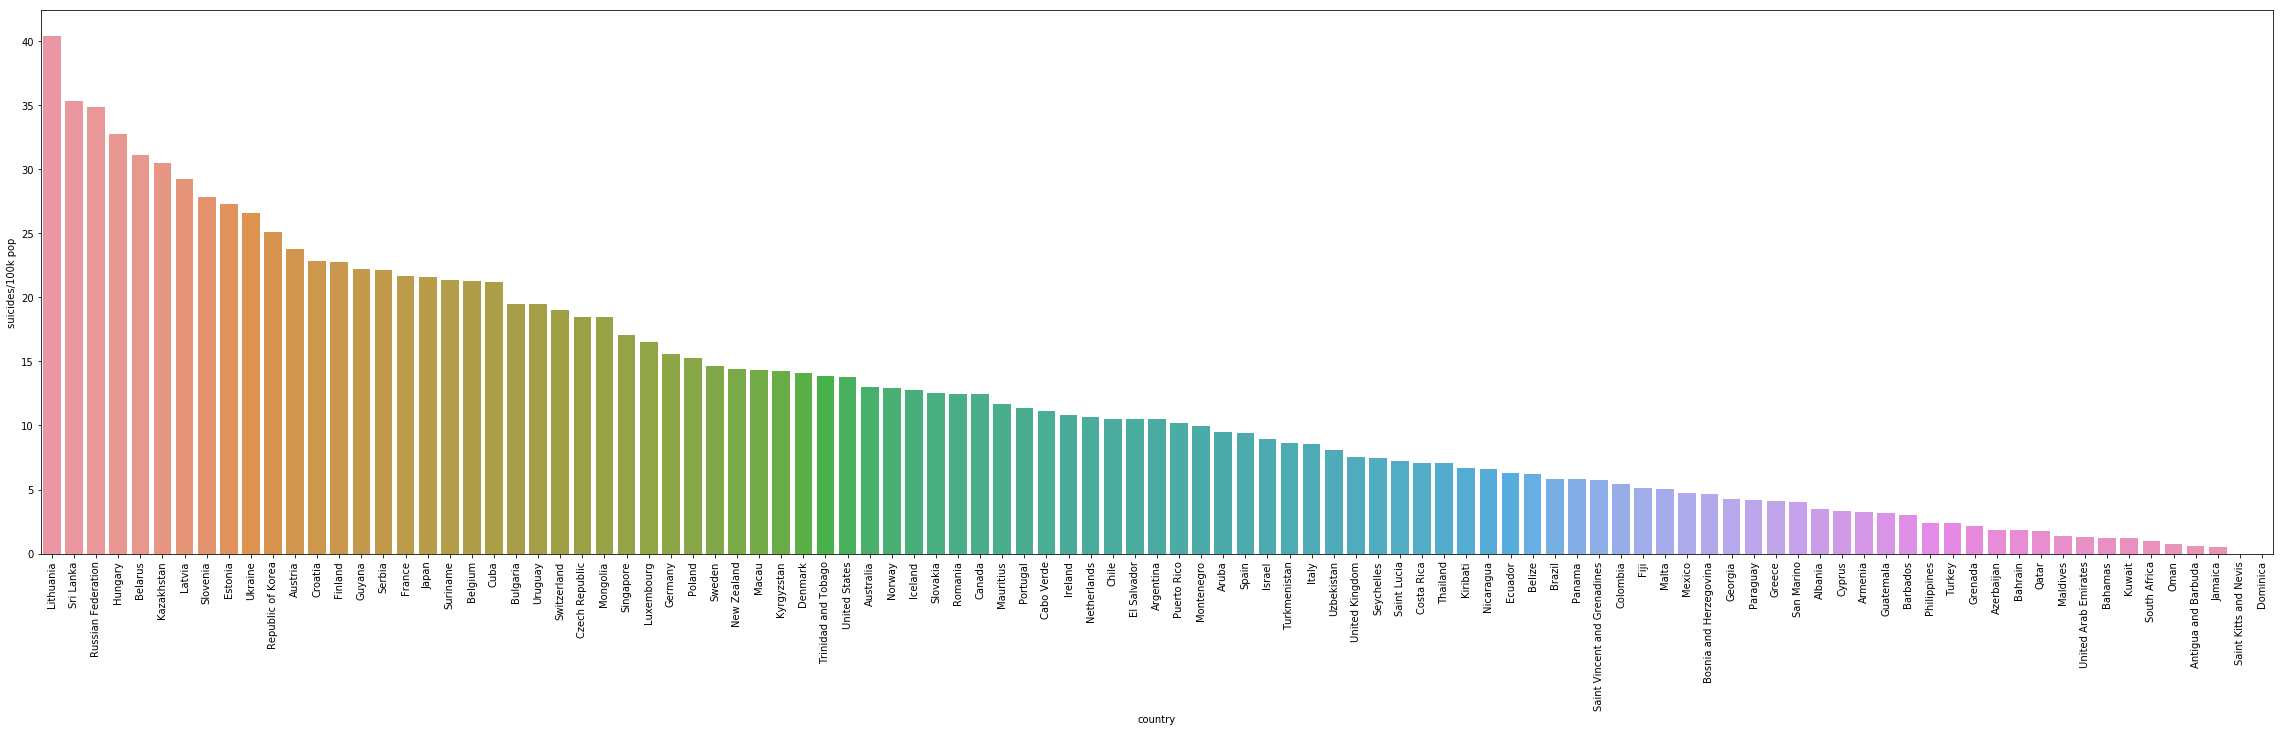

In [61]:
county = data[['country','suicides/100k pop']].groupby('country',as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False)
fig=plt.figure(figsize=(40,10))
sns.barplot(x=county['country'],y=county['suicides/100k pop'],data=county)
plt.xticks(rotation=90);

**Findings:** 
* Top 5 countries with the highest number of suicide cases are Lithuania, Sri Lanka, Russian, Hungary and Belarus. 

**Question 2: Which gender is more prone to suicide?**

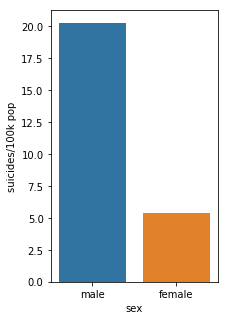

In [62]:
fig=plt.figure(figsize=(3,5));
sns.barplot(x='sex', y='suicides/100k pop',data=data[['sex','suicides/100k pop']].groupby('sex',as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False));

**Findings:**
* Males die by suicide approximately three times more than Females.

**Question 3: Out of these 101 countries, which generation / age group has the highest number of suicide rate?**

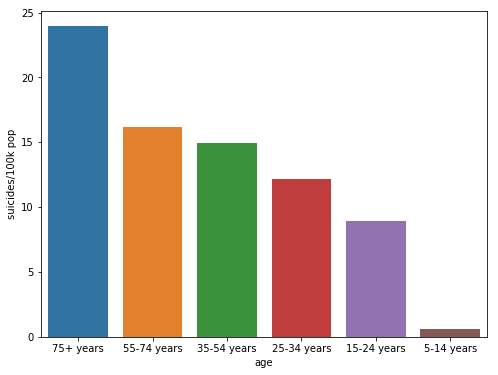

In [63]:
fig=plt.figure(figsize=(8,6));
sns.barplot(x='age',y='suicides/100k pop',data=data[['age','suicides/100k pop']].groupby('age',as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False));

**Findings:**
* Age group that has the highest suicide rate is the 75+ years group then followed by 55-74 years. 
* 5-14 years group has the lowest number of suicide case. 

**Question 4: Continue from the previous question, which gender of each group is more prone to suicide?**

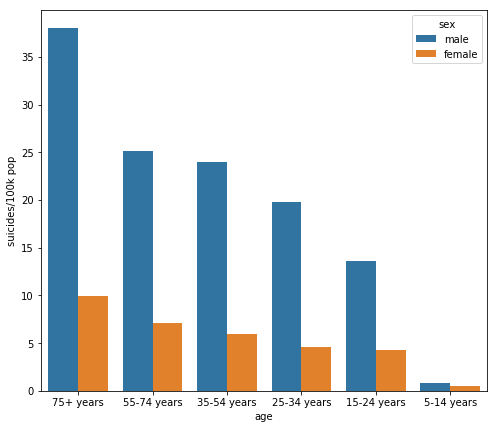

In [64]:
fig=plt.figure(figsize=(8,7));
sns.barplot(x='age', y='suicides/100k pop',hue='sex', data=data[['age','suicides/100k pop','sex']].groupby(['age','sex'],as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False));

**Findings:**
* Based on the shown figure above, Male is more likely to suicide than Female in every age group.

**Question 5: Is the suicide rate increasing or decreasing over the years 1985-2016?**

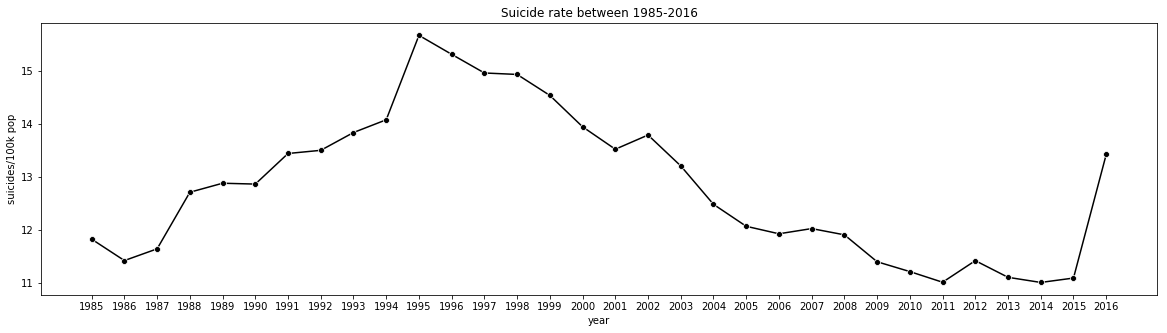

In [65]:
#fig=plt.figure(figsize=(15,5));
fig, ax = plt.subplots(figsize=(20, 5))
plt.title('Suicide rate between 1985-2016');
sns.lineplot(x='year', y='suicides/100k pop', data=data[['year','suicides/100k pop']].groupby('year',as_index=False).mean().sort_values(by='year',ascending=True),marker='o',color='BLACK');
ax.set(xticks=data['year'].unique());

**Findings:**
* By looking at the Black color line graph here, we can see that the overall suicide rate is gradually increasing from 1985 to 1994, and peaked at 1995. Since then, the suicide rate is slowly decreasing till 2015 and dramatically increased again at 2016. 
* Few interesting things that worth investigating are the reason of causing the peak at 1995 and the sharp increase at 2016.

**Question 6: What is the relationship between GDP and suicide rate?**

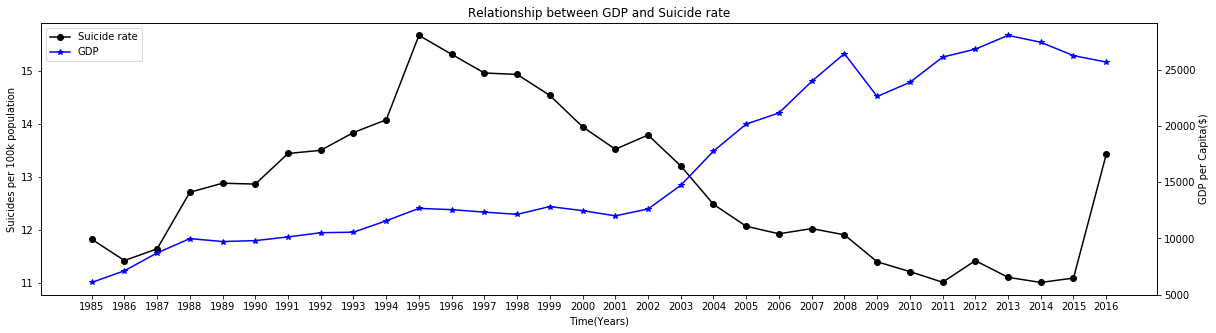

In [66]:
GDP_SR_Year = data[['year','suicides/100k pop', 'gdp_per_capita ($)']].groupby('year').mean().reset_index()

# line graph 1
fig, ax = plt.subplots(figsize=(20, 5))
year_SR = ax.plot(GDP_SR_Year['year'],GDP_SR_Year['suicides/100k pop'],marker='o',color='BLACK', label='Suicide rate')

# line graph 2
ax2 = ax.twinx()
year_GDP = ax2.plot(GDP_SR_Year['year'],GDP_SR_Year['gdp_per_capita ($)'],marker='*',color='BLUE', label='GDP') 

# Joining legends.
lns = year_SR + year_GDP
labels = [l.get_label() for l in lns]
ax.legend(lns, labels, loc=2)

# Setting labels
ax.set_ylabel('Suicides per 100k population')
ax2.set_ylabel('GDP per Capita($)')
ax.set_xlabel('Time(Years)')
ax.set(xticks=data['year'].unique());
plt.title('Relationship between GDP and Suicide rate');

**Findings:**
* It seems like there is not clear relationship between GDP and suicide rate. 
* However, one thing that is obvious is that the GDP is steadily improving in this period.

**Question 7: Which country has the lowest/highest suicide rate in 1995?**

In [67]:
data_1995 = data[data.year == 1995]
print ("Size of Year-1995 data: {} with {} unique countries".format(data_1995.shape, len(data_1995.country.unique())))
print ("Missing countries are: \n{}".format((set(data.country) - set(data_1995.country))))

Size of Year-1995 data: (936, 12) with 78 unique countries
Missing countries are: 
{'Jamaica', 'South Africa', 'Mongolia', 'Panama', 'Serbia', 'Bosnia and Herzegovina', 'Nicaragua', 'Sri Lanka', 'San Marino', 'Oman', 'Montenegro', 'Philippines', 'Fiji', 'Seychelles', 'Macau', 'Cyprus', 'Turkey', 'Dominica', 'Bahrain', 'Maldives', 'United Arab Emirates', 'Cabo Verde', 'Saint Kitts and Nevis'}


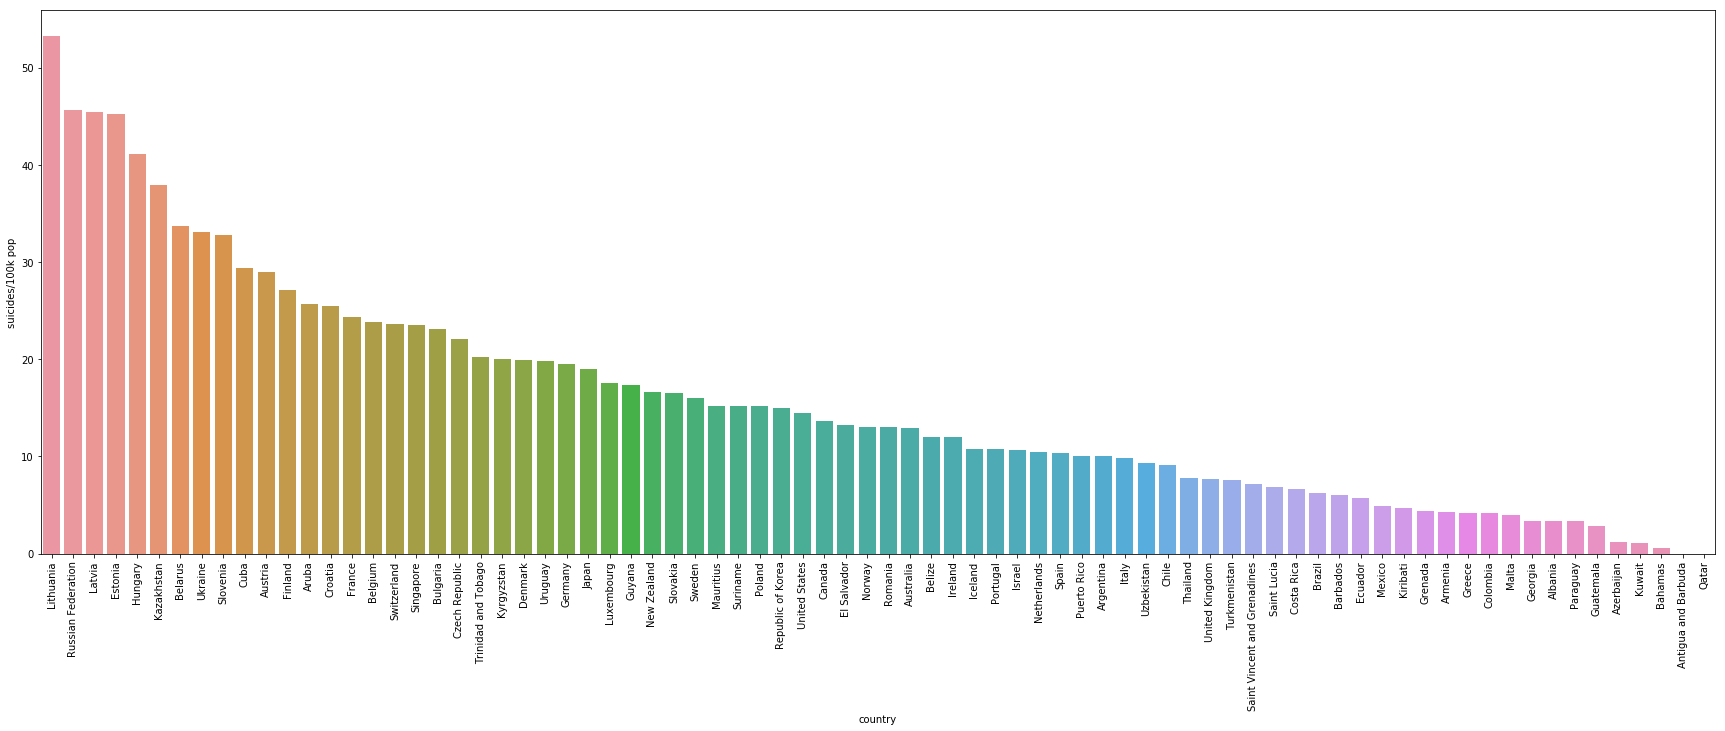

In [68]:
fig = plt.figure(figsize=(30,10))
sns.barplot(x='country', y='suicides/100k pop', data=data_1995[['country', 'suicides/100k pop']].groupby('country', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False));
plt.xticks(rotation=90);

**Findings:**

* The data in 1995 is incomplete and total of 23 countries are missing. 
* Lithuania contributed the most of suicide rate in 1995
* Two countries, namely, Antigua-Barbuda and Qatar, have exactly zero suicide rate in 1995. 

**Question 8: Which country has the lowest/highest GDP in 1995?**

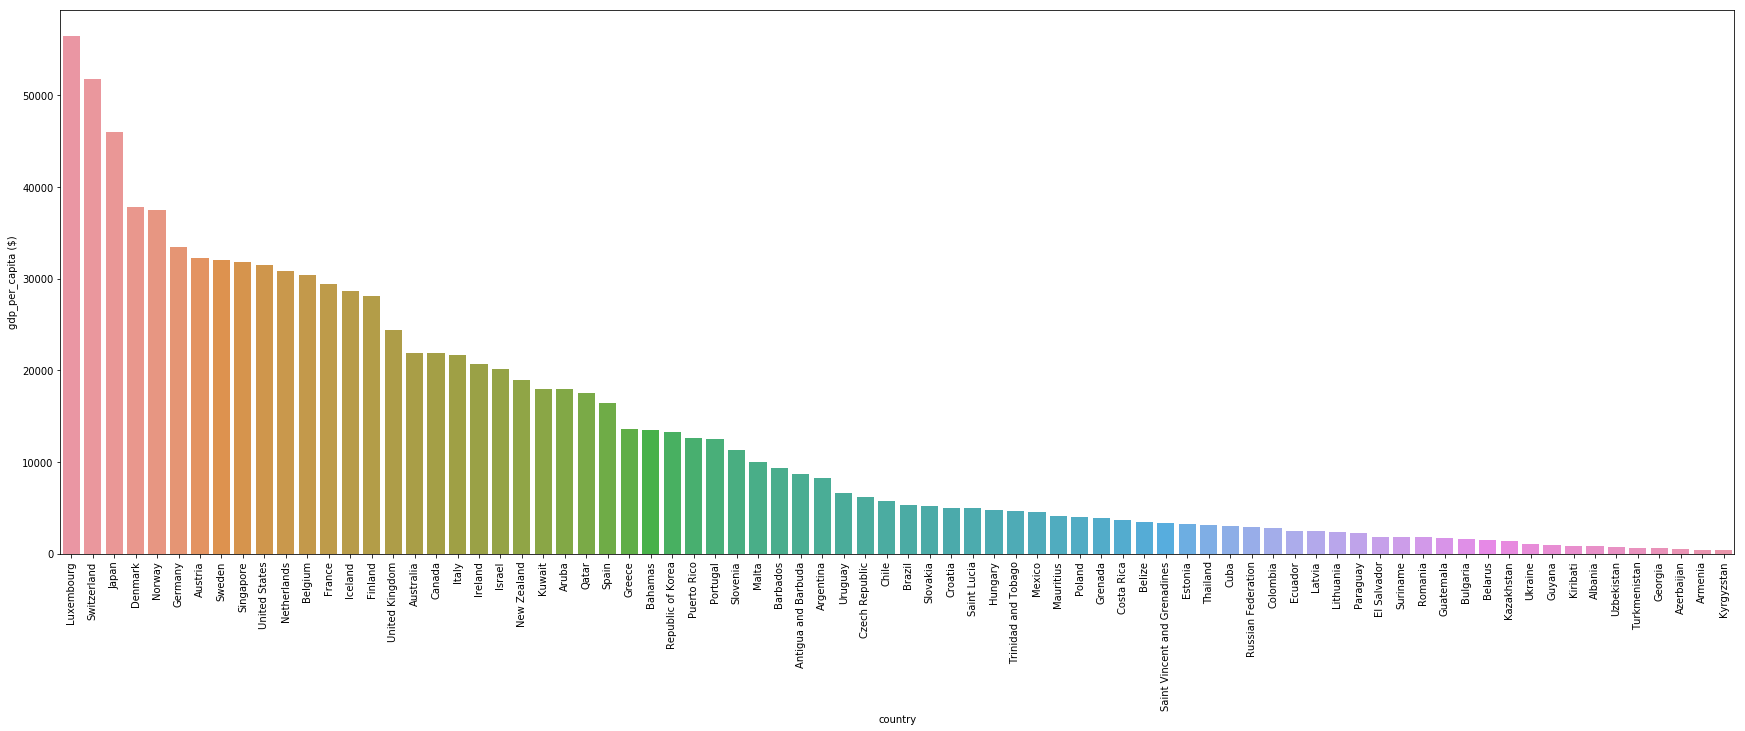

In [69]:
fig = plt.figure(figsize=(30,10))
sns.barplot(x='country', y='gdp_per_capita ($)', data=data_1995[['country', 'gdp_per_capita ($)']].groupby('country', as_index=False).mean().sort_values(by='gdp_per_capita ($)', ascending=False));
plt.xticks(rotation=90);

**Findings:**

* In 1995, Luxembourg has the highest GDP among other countries while Kyrgyzstan has the lowest GDP.

**Question 9: Which country has the lowest/highest suicide rate and GDP in 2016?**

In [70]:
data_2016 = data[data.year == 2016]
print ("Size of Year-2016 data: {} with {} unique countries".format(data_2016.shape, len(data_2016.country.unique())))
print ("Missing countries are: \n{}".format((set(data.country) - set(data_2016.country))))

Size of Year-2016 data: (160, 12) with 16 unique countries
Missing countries are: 
{'Ukraine', 'Switzerland', 'France', 'Germany', 'South Africa', 'Estonia', 'Republic of Korea', 'Luxembourg', 'Malta', 'Ireland', 'Nicaragua', 'Bahamas', 'Uzbekistan', 'Sri Lanka', 'Belarus', 'San Marino', 'Uruguay', 'Kiribati', 'Montenegro', 'Israel', 'Russian Federation', 'Italy', 'Paraguay', 'Guatemala', 'Suriname', 'Antigua and Barbuda', 'Finland', 'Belize', 'Slovakia', 'Aruba', 'Spain', 'Azerbaijan', 'Colombia', 'Georgia', 'Turkmenistan', 'Turkey', 'Mexico', 'Albania', 'Cuba', 'Portugal', 'Guyana', 'Maldives', 'Belgium', 'Saint Kitts and Nevis', 'Denmark', 'Barbados', 'Brazil', 'Norway', 'Jamaica', 'United Kingdom', 'Poland', 'Singapore', 'Japan', 'Panama', 'Serbia', 'Costa Rica', 'Bosnia and Herzegovina', 'Argentina', 'United States', 'Kuwait', 'Oman', 'Kazakhstan', 'Chile', 'Ecuador', 'Puerto Rico', 'Philippines', 'Fiji', 'Seychelles', 'Slovenia', 'Latvia', 'Kyrgyzstan', 'Macau', 'Greece', 'Bulgar

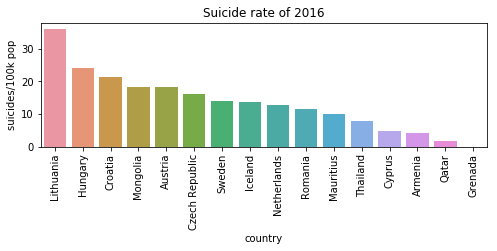

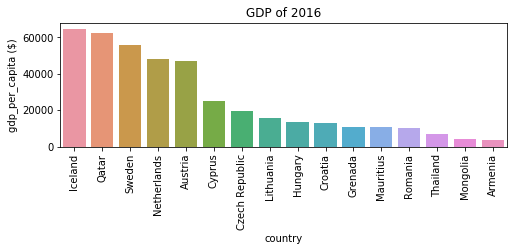

In [71]:
fig = plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
sns.barplot(x='country', y='suicides/100k pop', data=data_2016[['country', 'suicides/100k pop']].groupby('country', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False));
plt.xticks(rotation=90);
plt.title('Suicide rate of 2016');

fig = plt.figure(figsize=(8,5))
plt.subplot(2,1,2)
sns.barplot(x='country', y='gdp_per_capita ($)', data=data_2016[['country', 'gdp_per_capita ($)']].groupby('country', as_index=False).mean().sort_values(by='gdp_per_capita ($)', ascending=False));
plt.xticks(rotation=90);
plt.title('GDP of 2016');

**Findings:**

* There are even more missing data in the year of 2016. It has only 160 rows and 16 unique countries hence the analysis might be inaccurated.
* In 2016, Lithuania has the highest suicide rate, which is the same as 1995.
* In 2016, the country with the lowest suicide rate is Grenada and the preceding country is Qatar.
* In terms of GDP, Iceland is the highest while Armenia is the last in the ranking.
* We can conclude that high suicide rate doesn't imply low GDP, at least they are not negatively correlated in this case.

**Since the data is pretty incomplete, it might be a good idea to plot and see the number of countries of every year in the given dataset.**

**Question 10: What is the unique number of countries of every year in the dataset?**

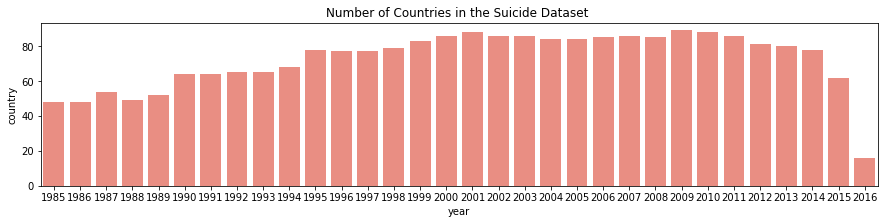

In [72]:
year_country = data[['year','country']].groupby('year',as_index=True).nunique()
year_country['year']= year_country.index
fig = plt.figure(figsize=(15,3));
sns.barplot(x='year', y='country', data=year_country,color="salmon");
plt.title('Number of Countries in the Suicide Dataset ');

**Findings:**

* The lowest bar is at the last year, 2016, which might be the actual reason for the sharp increased suicide rate in 2016. Please refer to the figure in Question 5.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

We have reviewed the suicide dataset based on our intuitions, such as gender, age group and GDP. 

Some quick conclusions that could be drawn: 
* Male has higher suicide rate than Female
* There is no clear correlation between GDP and suicide rate.
* Suicide rate is increasing with age. 

I will update this kernel from time to time. Any feedback and ideas are welcome. 
Thanks.